# 1. Preparing Yolov10

In [1]:
!git clone https://github.com/THU-MIG/yolov10.git

Cloning into 'yolov10'...
remote: Enumerating objects: 20304, done.
remote: Counting objects: 100% (1347/1347), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 20304 (delta 1301), reused 1224 (delta 1220), pack-reused 18957
Receiving objects: 100% (20304/20304), 11.18 MiB | 14.13 MiB/s, done.
Resolving deltas: 100% (14304/14304), done.


In [2]:
cd yolov10

/content/yolov10


In [ ]:
!pip install -q -r requirements.txt
!pip install -e .

In [ ]:
!wget https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt

In [1]:
from ultralytics import YOLOv10

model_path = "/content/yolov10/yolov10n.pt"
model = YOLOv10(model_path)

# 3. Preparing dataset

In [ ]:
!gdown '1tr9PSRRdlC2pNir7jsYugpSMG-7v32VJ' -O './images/'

In [7]:
IMG_PATH = './images/HCMC_Street.jpg'
result = model(source=IMG_PATH)[0]


image 1/1 /content/yolov10/images/HCMC_Street.jpg: 448x640 11 persons, 2 bicycles, 1 car, 2 motorcycles, 61.1ms
Speed: 18.7ms preprocess, 61.1ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)


In [8]:
result.save('./images/HCMC_Street_predict.png')

'./images/HCMC_Street_predict.png'

# 3. Download the  dataset

In [14]:
%cd /content
!gdown '1twdtZEfcw4ghSZIiPDypJurZnNXzMO7R'

/content
Downloading...
From (original): https://drive.google.com/uc?id=1twdtZEfcw4ghSZIiPDypJurZnNXzMO7R
From (redirected): https://drive.google.com/uc?id=1twdtZEfcw4ghSZIiPDypJurZnNXzMO7R&confirm=t&uuid=47eeb4bb-fefd-4dd2-8f2b-8ba95724b8d9
To: /content/Safety_Helmet_Dataset.zip
100% 33.7M/33.7M [00:00<00:00, 80.8MB/s]


In [ ]:
!mkdir safety_helmet_dataset
%cd /content/safety_helmet_dataset
!gdown '1twdtZEfcw4ghSZIiPDypJurZnNXzMO7R'
!unzip '/content/Safety_Helmet_Dataset.zip'

# 4. Train on the given dataset

In [3]:
YAML_PATH = '/content/safety_helmet_dataset/data.yaml'
EPOCHS = 20
IMG_SIZE = 640
model.train(data = YAML_PATH, epochs = EPOCHS, imgsz = IMG_SIZE )

New https://pypi.org/project/ultralytics/8.2.42 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolov10/yolov10n.pt, data=/content/safety_helmet_dataset/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, reti

100%|██████████| 6.23M/6.23M [00:00<00:00, 281MB/s]


AMP: checks passed ✅


train: Scanning /content/safety_helmet_dataset/train/labels.cache... 761 images, 0 backgrounds, 0 corrupt: 100%|██████████| 761/761 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/safety_helmet_dataset/valid/labels.cache... 218 images, 0 backgrounds, 0 corrupt: 100%|██████████| 218/218 [00:00<?, ?it/s]


Plotting labels to /content/yolov10/runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/yolov10/runs/detect/train4
Starting training for 20 epochs...

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       1/20      3.18G      1.653      2.542      1.638      1.462      4.566      1.481         25        640: 100%|██████████| 48/48 [00:22<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        218        586    0.00884      0.599      0.175     0.0862



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       2/20      3.23G      1.686      1.887       1.62      1.546      3.886      1.503         50        640: 100%|██████████| 48/48 [00:17<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]

                   all        218        586      0.734      0.158      0.259      0.113



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       3/20      3.23G      1.709      1.784      1.606      1.598      3.329      1.512         53        640: 100%|██████████| 48/48 [00:17<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.82it/s]

                   all        218        586      0.604      0.245      0.234      0.091



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       4/20      3.19G      1.716      1.771      1.627      1.644      3.036      1.541         31        640: 100%|██████████| 48/48 [00:21<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]

                   all        218        586      0.675      0.349      0.349       0.15



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       5/20       3.2G      1.699      1.707      1.626      1.644      2.724       1.55         35        640: 100%|██████████| 48/48 [00:18<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]

                   all        218        586      0.741      0.367      0.412      0.185



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       6/20       3.2G      1.638      1.569      1.548      1.622      2.404      1.483         33        640: 100%|██████████| 48/48 [00:18<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]

                   all        218        586      0.691       0.37      0.381      0.156



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       7/20       3.2G       1.67      1.523      1.564      1.651      2.188      1.507         46        640: 100%|██████████| 48/48 [00:18<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.80it/s]

                   all        218        586        0.7      0.399       0.44      0.207



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       8/20       3.2G      1.618       1.49       1.54      1.604      2.067      1.477         62        640: 100%|██████████| 48/48 [00:17<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]

                   all        218        586      0.495      0.602      0.547      0.256



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       9/20       3.2G      1.618      1.436      1.532      1.612      1.939      1.465         44        640: 100%|██████████| 48/48 [00:17<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.63it/s]

                   all        218        586      0.765       0.44      0.576      0.286



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      10/20       3.2G      1.591      1.375      1.528      1.598      1.807      1.465         49        640: 100%|██████████| 48/48 [00:18<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]

                   all        218        586      0.428      0.631      0.569      0.278


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      11/20      3.38G      1.589      1.304      1.573      1.586      1.751      1.519         27        640: 100%|██████████| 48/48 [00:19<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.88it/s]

                   all        218        586      0.653       0.56      0.626      0.286



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      12/20      3.16G      1.555      1.185      1.544      1.585      1.537      1.515         22        640: 100%|██████████| 48/48 [00:16<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]

                   all        218        586       0.66      0.643      0.666      0.306



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      13/20      3.15G      1.546       1.13      1.534      1.546      1.474      1.513         24        640: 100%|██████████| 48/48 [00:16<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        218        586      0.645      0.638      0.654      0.313



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      14/20      3.17G      1.498      1.062      1.514      1.521      1.349      1.477         24        640: 100%|██████████| 48/48 [00:16<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]

                   all        218        586      0.682      0.613      0.698      0.339



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      15/20      3.17G        1.5      1.033      1.505      1.506      1.304      1.463         26        640: 100%|██████████| 48/48 [00:20<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]

                   all        218        586      0.679      0.669      0.736      0.376



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      16/20      3.19G      1.449     0.9637      1.462      1.474      1.182      1.432         26        640: 100%|██████████| 48/48 [00:17<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]

                   all        218        586      0.694      0.676      0.747      0.367



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      17/20      3.17G      1.433     0.9345      1.452      1.464      1.144      1.435         28        640: 100%|██████████| 48/48 [00:18<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]

                   all        218        586      0.791      0.666      0.747      0.381



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      18/20      3.16G        1.4     0.9096      1.419      1.427      1.132        1.4         20        640: 100%|██████████| 48/48 [00:16<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]

                   all        218        586      0.719      0.703      0.754      0.375



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      19/20      3.16G      1.378     0.8684      1.412      1.399      1.051       1.39         29        640: 100%|██████████| 48/48 [00:17<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]

                   all        218        586      0.712      0.753      0.764      0.385



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      20/20      3.17G      1.368     0.8463      1.394      1.399      1.026      1.373         20        640: 100%|██████████| 48/48 [00:16<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        218        586      0.807      0.669      0.774      0.393



20 epochs completed in 0.137 hours.
Optimizer stripped from /content/yolov10/runs/detect/train4/weights/last.pt, 5.8MB
Optimizer stripped from /content/yolov10/runs/detect/train4/weights/best.pt, 5.8MB

Validating /content/yolov10/runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2695586 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]


                   all        218        586      0.809      0.667      0.774      0.393
                  head        218         27       0.74      0.519      0.573      0.266
                helmet        218        285      0.837      0.768      0.898      0.448
                person        218        274       0.85      0.715      0.851      0.465
Speed: 4.6ms preprocess, 5.2ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to /content/yolov10/runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e039383ab90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

# 5. Training value

In [7]:
TRAINED_MODEL_PATH = '/content/yolov10/runs/detect/train4/weights/best.pt'
model = YOLOv10(TRAINED_MODEL_PATH)
model.val(data = YAML_PATH, imgsz = IMG_SIZE, split = 'test')

Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2695586 parameters, 0 gradients, 8.2 GFLOPs


val: Scanning /content/safety_helmet_dataset/test/labels... 109 images, 0 backgrounds, 0 corrupt: 100%|██████████| 109/109 [00:00<00:00, 1014.36it/s]

val: New cache created: /content/safety_helmet_dataset/test/labels.cache



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]


                   all        109        320      0.689      0.694      0.729      0.386
                  head        109         16      0.622      0.562      0.611      0.285
                helmet        109        162      0.767      0.802      0.867      0.451
                person        109        142      0.677      0.718      0.709      0.422
Speed: 4.0ms preprocess, 8.8ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to /content/yolov10/runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e039555bc70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

# 6. Predict on online sources

In [4]:
result = model.predict(source = "https://lsvn.vn/storage/uploads/photos/1015/60581402658f9.jpg", save = True)


Found https://lsvn.vn/storage/uploads/photos/1015/60581402658f9.jpg locally at 60581402658f9.jpg
image 1/1 /content/60581402658f9.jpg: 480x640 5 helmets, 15.6ms
Speed: 3.3ms preprocess, 15.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/yolov10/runs/detect/predict


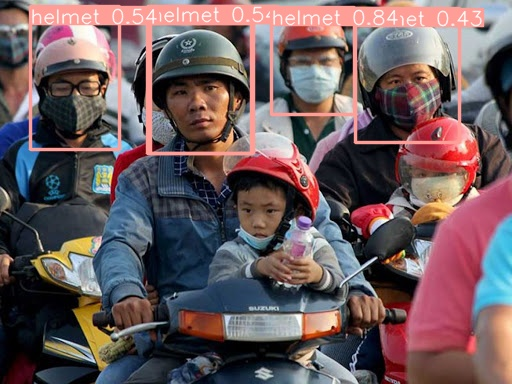

In [6]:
from IPython.display import Image
Image("/content/yolov10/runs/detect/predict/60581402658f9.jpg")